In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 10**4

def estimate (theta, limit, exclude=True):
    # генерируем выборку
    sample = sps.uniform.rvs(size = N, loc = 0, scale = theta) 
    
    # вычисляем оценки
    # оценка: 2<X>
    estimation_1 = [np.average(sample[:n]) * 2 for n in range(1, N)] 
    # оценка: <X> + X_n / 2
    estimation_2 = [np.average(sample[:n]) + np.max(sample[:n]) / 2 for n in range(1, N)] 
    # оценка: (n + 1) * X_1
    estimation_3 = [np.min(sample[:n]) * (n + 1) for n in range(1, N)] 
    # оценка: X_1 + X_n
    estimation_4 = [np.min(sample[:n]) + np.max(sample[:n]) for n in range(1, N)] 
    # оценка: X_n *(n + 1) / n
    estimation_5 = [((n + 1) / n) * np.max(sample[:n]) for n in range(1, N)]
    
    #строим графики для всех оценок:
    n = np.arange(1, N, dtype=int)    
    diff = theta*np.ones(N-1)
    
    plt.figure(figsize = (15, 10))
    plt.plot(n, np.abs(estimation_1 - diff), label=r'$2 \overline{X}$')
    plt.plot(n, np.abs(estimation_2 - diff), label=r'$\overline{X} + \frac{X_{(n)}} {2}$')
    plt.plot(n, np.abs(estimation_4 - diff), label=r'$X_{(1)} + X_{(n)}$')
    plt.plot(n, np.abs(estimation_5 - diff), label=r'$\frac{(n + 1)} {n} X_{(n)}$')
    if not exclude:
        plt.plot(n, np.abs(estimation_3 - diff), label=r'$(n+1) X_{(1)}$')
    plt.xlabel(r'$n$', fontsize = 18) 
    plt.ylabel(r'$| \theta - \hat{\theta}|$', fontsize = 18)
    plt.legend(fontsize=15, loc=1)
    plt.ylim(0, limit) 
    plt.grid()
    plt.show() 
    return

Построим графики для значения $\theta = 1$ 

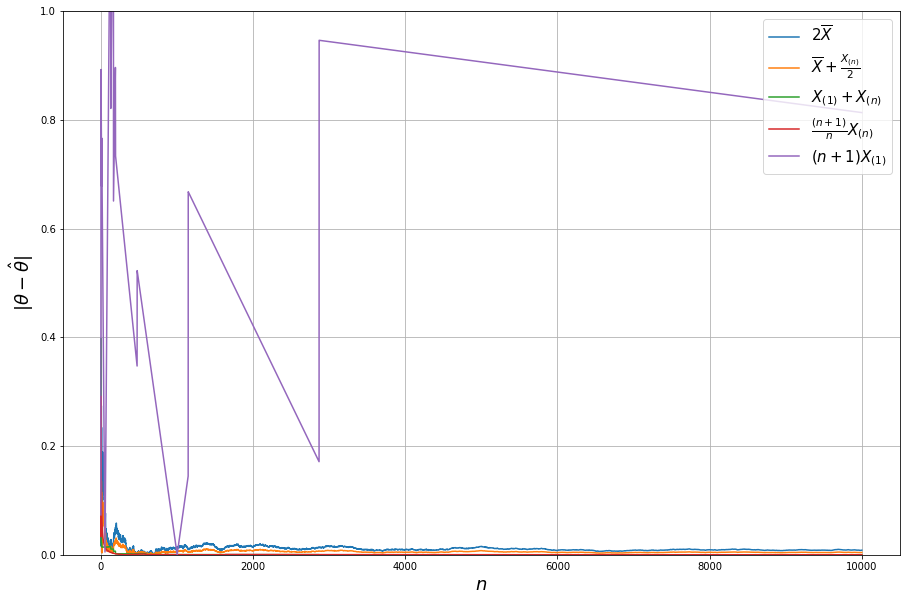

In [3]:
estimate(1, 1, False)

По графику видно, что оценка $(n+1) X_{(1)}$ сильно отличается от истинного значения параметра $\theta$. Исключим её из рассмотрения и построим несколько графиков для разных значений параметров.

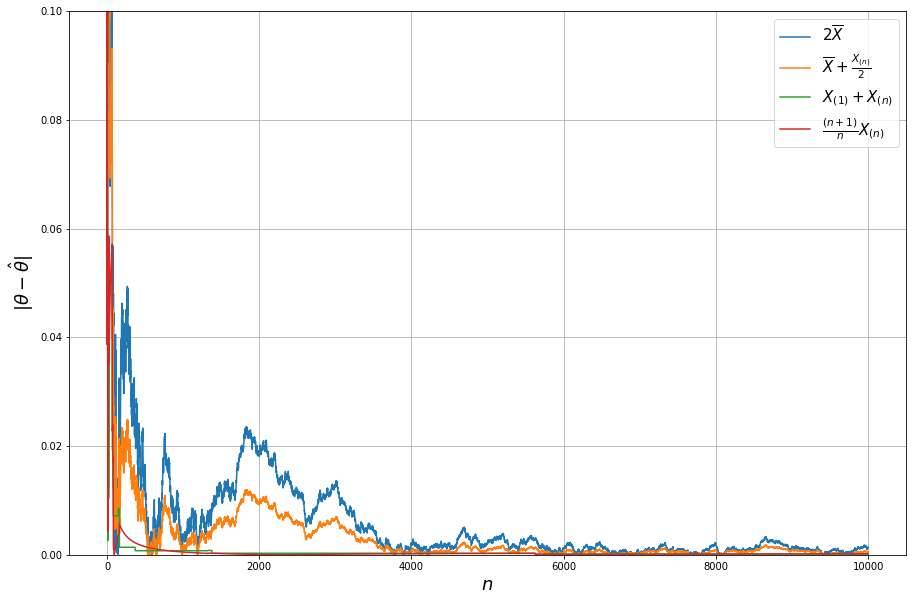

In [4]:
estimate(1, 0.1)

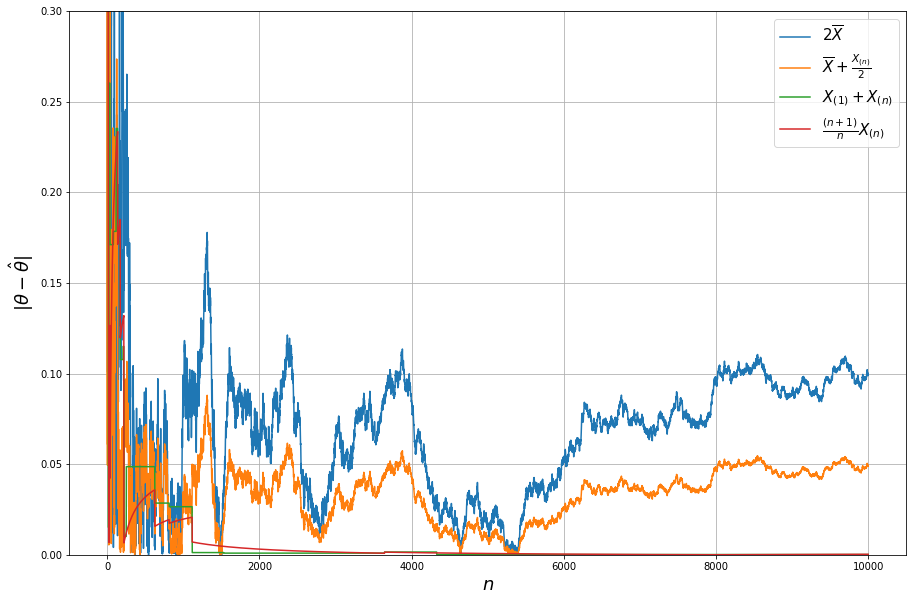

In [5]:
estimate(10, 0.3)

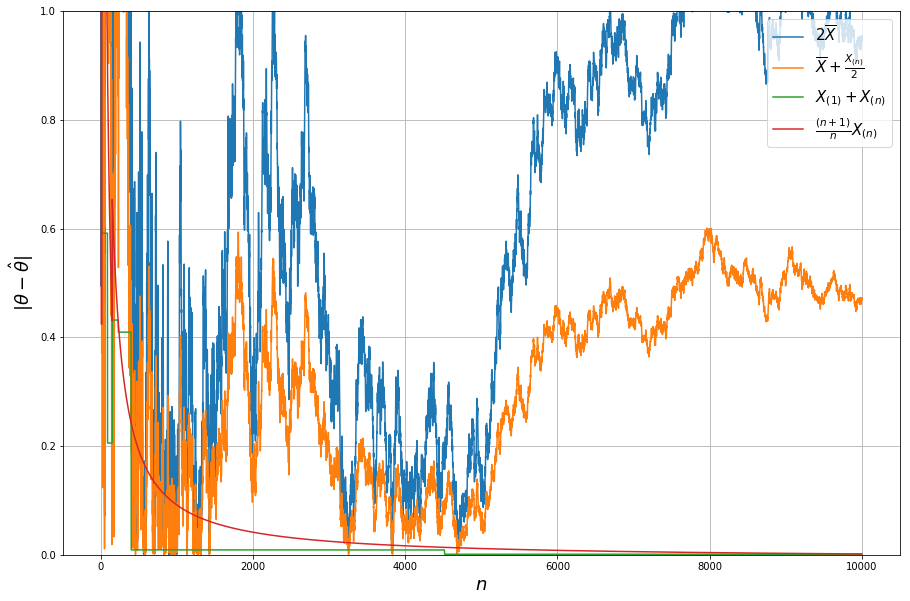

In [6]:
estimate(100, 1)

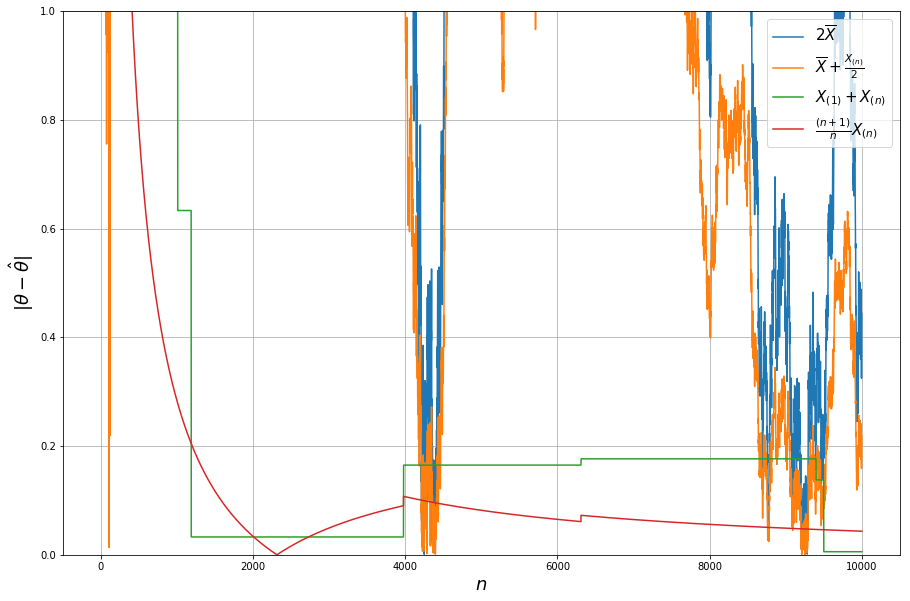

In [7]:
estimate(500, 1)

# Вывод:

1. Оценка $(n+1) X_{(1)}$ является наихудшей. Это подтверждается теоретически, т.к. она несостоятельна. <br>
2. Оценки $X_{(1)} + X_{(n)}$ и $\overline{X} + \frac{X_{(n)}} {2}$ являются наилучшими. Разность $\theta$ и этих оценок всегда находятся в малой окрестности нуля. <br>
3. С ростом $\theta$ растёт величина ошибки.